In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import math, copy

In [3]:
data = fetch_california_housing(as_frame = True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.shape
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


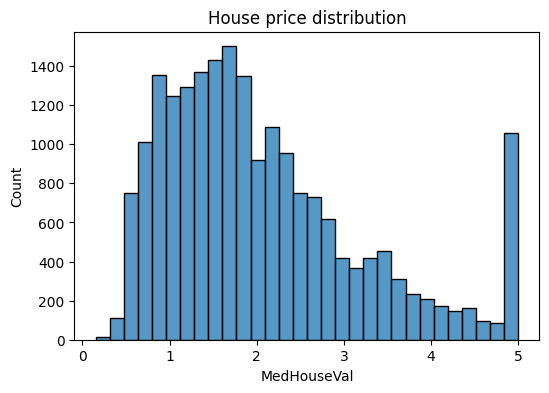

In [6]:
plt.figure(figsize = (6,4))
sns.histplot(df["MedHouseVal"], bins = 30)
plt.title("House price distribution")
plt.show()

In [7]:
X = df.drop("MedHouseVal", axis = 1).values
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [8]:
y = np.array(df["MedHouseVal"]).reshape(-1,1)
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]], shape=(20640, 1))

In [9]:
def feature_scaling(X):
    mu = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_norm = (X - mu)/std

    return X_norm

In [10]:
X = feature_scaling(X)

In [11]:
def compute_cost(X, y, w, b):
    m = len(X)
    total_cost = 0.0
    for i in range(m):
        f_wb_i = (np.dot(X[i],w) + b) - y[i]
        fn = f_wb_i ** 2
        total_cost += fn
    return total_cost/(2 * m)
        

In [12]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros_like(w)
    dj_db = 0
    for i in range(m):
        f_wb_i = (np.dot(X[i],w) + b) - y[i, 0]
        for j in range(n):
            dj_dw += f_wb_i * X[i,j]
        dj_db += f_wb_i
    return dj_dw/m , dj_db/m

In [13]:
def compute_gradient_descent(X, y, w, b, alpha, iters):
    J_history = []

    for i in range(iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = float(compute_cost(X, y, w, b))
        J_history.append(cost)

        if i % (iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")

    return w, b, J_history


In [14]:
X = feature_scaling(X)

initial_w = np.zeros(X.shape[1])
initial_b = 0

alpha = 0.01
iterations = 1000

w_final, b_final, J_hist = compute_gradient_descent(
    X, y, initial_w, initial_b, alpha, iterations
)

print(f"b: {b_final:.3f}")
print(f"w: {w_final}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12524\3658172719.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost = float(compute_cost(X, y, w, b))


Iteration    0: Cost     2.76
Iteration  100: Cost     0.90
Iteration  200: Cost     0.66
Iteration  300: Cost     0.63
Iteration  400: Cost     0.62
Iteration  500: Cost     0.62
Iteration  600: Cost     0.62
Iteration  700: Cost     0.62
Iteration  800: Cost     0.62
Iteration  900: Cost     0.62
b: 2.068
w: [0.1099872 0.1099872 0.1099872 0.1099872 0.1099872 0.1099872 0.1099872
 0.1099872]


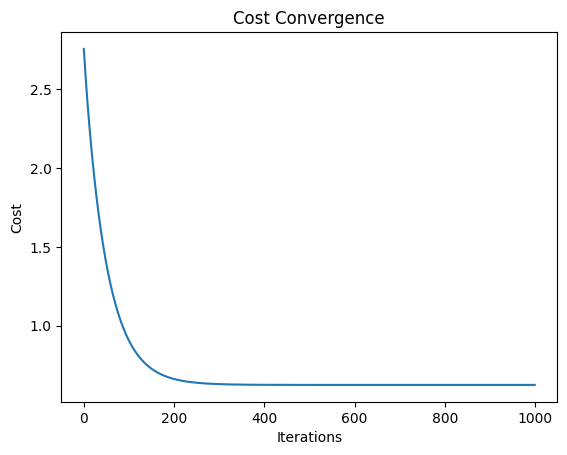

In [15]:
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.show()
